In [128]:
import os
import sys
import datetime
import re
import pandas as pd
import numpy as np
from IPython.display import display
import psutil
#from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

In [145]:
def sub_dirs_with_files(ddir, fname_incl=None):
  from collections import deque
  import re
  res = []
  que = deque()
  que.appendleft(ddir)
  while len(que) > 0:
    popdir = que.pop()
    alls = [x for x in os.listdir(popdir)]
    files = [f for f in alls if os.path.isfile(os.path.join(popdir, f))]
    if fname_incl:
      files = [x for x in files if re.search(fname_incl, x)]
    if len(files) > 0:
      res.append(popdir)
    dirs = [os.path.join(popdir, x) for x in alls if os.path.isdir(os.path.join(popdir, x))]
    que.extend(dirs)
  return res
 
sdirs = sub_dirs_with_files("./data", fname_incl="secF")
sdirs

['./data\\2021\\11', './data\\2021\\10']

In [154]:
fname_incl = "secFilings"
dfs = []
for sdir in sdirs:
    print(sdir)
    files = [f for f in os.listdir(sdir) if os.path.isfile(os.path.join(sdir, f))]
    if fname_incl:
      files = [x for x in files if re.search(fname_incl, x)]
    for file in files:
      #print(f"  {file}")
      df = pd.read_csv(os.path.join(sdir, file))
      #print(df.shape)
      dfs.append(df)
print(len(dfs))
filedf = pd.concat(dfs)

./data\2021\11
./data\2021\10
25


In [172]:
filedf.shape
filedf.head()
gbcols = ["company", "form"]
gbcols = ["form", "date"]
othercols = ["company"]
gbcols = ["company", "date"]
othercols = ["form"]
allcols = othercols + gbcols
print(allcols)
cnts = filedf[allcols].groupby(gbcols).count().sort_values(othercols[0])

['form', 'company', 'date']


In [173]:
display(cnts.tail(29))

,,form
company,date,
GOLDMAN SACHS GROUP INC,20211102.0,69
GS Finance Corp.,20211102.0,69
JPMORGAN CHASE & CO,20211112.0,69
BARCLAYS BANK PLC,20211102.0,70
iSHARES TRUST,20211027.0,71
JPMorgan Chase Financial Co. LLC,20211116.0,73
JPMORGAN CHASE & CO,20211116.0,73
MORGAN STANLEY,20211028.0,75
Morgan Stanley Finance LLC,20211028.0,75


,cnt
dt,
2021-01-04,16.0
2021-01-05,16.0
2021-01-06,13.0
2021-01-07,14.0
2021-01-08,20.0


2021-11-18 00:00:00


<AxesSubplot:title={'center':'# 13F filings by date'}, xlabel='dt'>

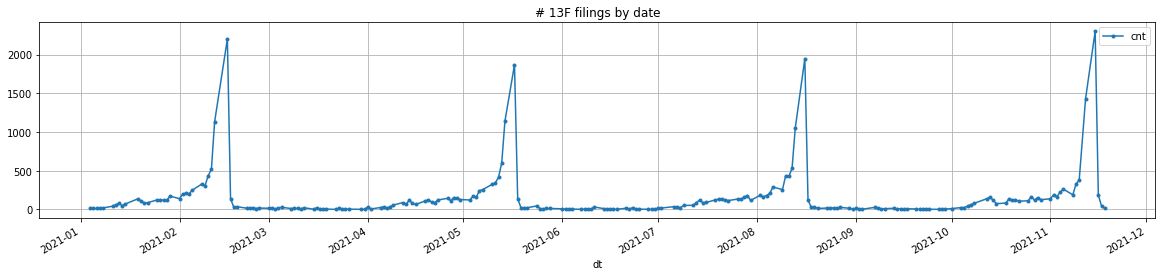

In [127]:
# read the daily form files
# this just gives a list of  filers per day
# plot how many per day
cnts = []
ddir = "./data"

csvfiles = [x for x in os.listdir(ddir) if x.endswith(".csv") and x.startswith("dailyForms")]
for fname in csvfiles:
  filesdf = pd.read_csv(os.path.join(ddir,fname))
  expected_num_files = filesdf.shape[0]
  nameparts = os.path.splitext(fname)[0].split("_")
  filesdir = nameparts[2]
  found_files = [x for x in os.listdir(os.path.join(ddir,filesdir)) if x.endswith(".txt")]
  found_num_files = len(found_files)
  cnts.append((filesdir, found_num_files))
  if expected_num_files != found_num_files:
    print(f"{filesdir} {found_num_files} != {expected_num_files}")
  else:
    pass
    #print(f"{filesdir} OK")
cntsdf = pd.DataFrame(cnts, columns=["dtstr", "cnt"])
cntsdf["dt"] = pd.to_datetime(cntsdf["dtstr"])
cntsdf["cnt"] = cntsdf["cnt"].astype(float)
cntsdf.set_index("dt", inplace=True)
cntsdf.drop("dtstr", axis=1, inplace=True)
display(cntsdf.head())
print(cntsdf.index.max())
cntsdf.plot(y="cnt", figsize=(20,4), grid=True, marker='.', title="# 13F filings by date")

In [71]:
# make a list of the data directories that contain the parsed filings
ddirs = [x for x in os.listdir("./data") if os.path.isdir(os.path.join("./data",x))]
ddirs = [x for x in ddirs if x.startswith("2")]
ddirs.sort(reverse=True)
print(len(ddirs))
ddirs[:2]

220


['20211118', '20211117']

In [72]:
# read the form files
ddir = "./data"
tups = []
dailyfiles = [x for x in os.listdir(ddir) if x.endswith(".csv") and x.startswith("dailyForms")]
dfs = []
for fname in dailyfiles:
  tdf = pd.read_csv(os.path.join(ddir,fname))
  dfs.append(tdf)
compsdf = pd.concat(dfs)
print(compsdf.shape)
compsdf.sort_values("company", inplace=True)
display(compsdf.head(1))

(31741, 6)


,form,company,CIK,date,url,fid
0,13F-HR,"1060 Capital, LLC",1602119,20210216,edgar/data/1602119/0000950123-21-002411.txt,0000950123-21-002411


In [77]:
def find_in_daily(df, company_name):
  z = df.loc[df["company"].apply(lambda x: re.search(company_name, x.lower()) is not None)]
  return z
find_in_daily(compsdf, "resea")
  
  

,form,company,CIK,date,url,fid
1,13F-HR,"ACR Alpine Capital Research, LLC",1508822,20210428,edgar/data/1508822/0001085146-21-001349.txt,0001085146-21-001349
0,13F-HR,"ACR Alpine Capital Research, LLC",1508822,20210728,edgar/data/1508822/0001085146-21-002098.txt,0001085146-21-002098
0,13F-HR,"ACR Alpine Capital Research, LLC",1508822,20210122,edgar/data/1508822/0001085146-21-000213.txt,0001085146-21-000213
0,13F-HR,"ACR Alpine Capital Research, LLC",1508822,20211022,edgar/data/1508822/0001085146-21-002875.txt,0001085146-21-002875
14,13F-HR,"ADVANCED RESEARCH INVESTMENT SOLUTIONS, LLC",1802867,20210212,edgar/data/1802867/0001104659-21-021317.txt,0001104659-21-021317
...,...,...,...,...,...,...
148,13F-HR,Yorktown Management & Research Co Inc,1313559,20210803,edgar/data/1313559/0000950123-21-009538.txt,0000950123-21-009538
1478,13F-HR,"Zeno Research, LLC",1792460,20210216,edgar/data/1792460/0001420506-21-000266.txt,0001420506-21-000266
1045,13F-HR,"Zeno Research, LLC",1792460,20211112,edgar/data/1792460/0001420506-21-001530.txt,0001420506-21-001530
1288,13F-HR,"Zeno Research, LLC",1792460,20210517,edgar/data/1792460/0001420506-21-000714.txt,0001420506-21-000714


In [78]:
# read the csv files
basedir = "./data"
dfs = []
tups = []
for ddir in ddirs:
  iddir = int(ddir)
  if iddir < 20210701 or iddir > 20210901:
    continue
  csvfiles = [x for x in os.listdir(os.path.join(basedir, ddir)) if x.endswith(".csv")]
  for fname in csvfiles:
    ddict = {}    
    df = pd.read_csv(os.path.join(basedir, ddir, fname))
    company = os.path.splitext(fname)[0].split("_")[0]
    df["company"] = company
    dfs.append(df)
    ddict["name"] = fname
    ddict["date"] = ddir
    ddict["N"] = df.shape[0]
    ddict["value"] = df["value"].sum()
    if "sshPrnamtType" in df.columns:
      stypes = df["sshPrnamtType"].value_counts()
      for idx, val in stypes.iteritems():
        pass
        #ddict[idx] = val
    tups.append(ddict)
df = pd.DataFrame(tups)
print(df.shape)
df  

C:\Users\jmull\Anaconda3\envs\edgar\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(6244, 4)


,name,date,N,value
0,Baron-Financial-Group_-LLC_1832093_0001832093-...,20210901,241,16340863120
1,Baron-Financial-Group_-LLC_1832093_0001832093-...,20210901,256,26412694192
2,Colony-Family-Offices_-LLC_1633573_0001398344-...,20210901,24,163807000
3,Elephas-Investment-Management-Ltd_1731191_0001...,20210901,22,366925000
4,GoalVest-Advisory-LLC_1839307_0001839307-21-00...,20210901,243,161166000
...,...,...,...,...
6239,Modus-Advisors_-LLC_1799284_0001799284-21-0000...,20210701,271,237711000
6240,PARK-NATIONAL-CORP-_OH__805676_0001104659-21-0...,20210701,471,2384074000
6241,Pensionfund-DSM-Netherlands_1297731_0001297731...,20210701,204,777515000
6242,Pensionfund-Sabic_1637246_0001637246-21-000003...,20210701,210,468757000


In [80]:
fulldf = pd.concat(dfs)
display(fulldf.shape)

(2483985, 17)

In [83]:
fulldf.head(2)

,nameOfIssuer,titleOfClass,cusip,value,shrsOrPrnAmt,sshPrnamt,sshPrnamtType,investmentDiscretion,votingAuthority,Sole,Shared,None,wt,perSh,company,otherManager,putCall
0,1Life Healthcare Ord,COM,68269G107,1368000,\n\t\t\t,35,SH,SOLE,\n\t\t\t,0,0,35,0.000084,39085.714286,Baron-Financial-Group,NaN,NaN
1,1St Comnwlth Finl Co,COM,319829107,10605000,\n\t\t\t,738,SH,SOLE,\n\t\t\t,0,0,738,0.000649,14369.918699,Baron-Financial-Group,NaN,NaN


In [119]:
allcols = ["nameOfIssuer", "cusip"]
gbcols = ["cusip"]
allcols = ["value","sshPrnamt", "perSh", "cusip"]
gbcols = ["cusip"]
x = fulldf[allcols].groupby(gbcols).sum()
x.sort_values(list(x.columns)[0], ascending=False,  inplace=True)
x.tail(2)

,value,sshPrnamt,perSh
cusip,,,
302301AF3,-3414888184,149818000,-6440.857844
46625h100,-3617195184,13740927,-275280.654908


In [125]:
import  mariadb
conn = mariadb.connect(user="root", password="!one4Beer")

In [126]:
dir(conn)

['DatabaseError',
 'Error',
 'IntegrityError',
 'InterfaceError',
 'InternalError',
 'NotSupportedError',
 'OperationalError',
 'ProgrammingError',
 'Warning',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'auto_reconnect',
 'autocommit',
 'change_user',
 'character_set',
 'close',
 'collation',
 'commit',
 'connect',
 'connection_id',
 'converter',
 'cursor',
 'database',
 'dsn',
 'escape_string',
 'get_server_version',
 'kill',
 'ping',
 'reconnect',
 'reset',
 'rollback',
 'server_info',
 'server_name',
 'server_port',
 'server_version',
 'server_version_info',
 'tls_cipher',
 'tls_version',
 'tpc_begin',
 'tpc_commit',
 'tpc_prepare',
 'tpc_recover',
 'tpc_rollback',
 'unix_socke

In [112]:
for i, cusip in enumerate(list(x.index)[-3:]):
  print(i, cusip, x.loc[cusip])
  y = fulldf.loc[fulldf["cusip"]==cusip]["nameOfIssuer"].value_counts()
  print(y.head(1))
  print("---")

0 G54035103 value       -3401543592
sshPrnamt      32333131
Name: G54035103, dtype: int64
LAZARD GROWTH ACQUISITION CO    80
Name: nameOfIssuer, dtype: int64
---
1 302301AF3 value       -3414888184
sshPrnamt     149818000
Name: 302301AF3, dtype: int64
EZCORP INC    11
Name: nameOfIssuer, dtype: int64
---
2 46625h100 value       -3617195184
sshPrnamt      13740927
Name: 46625h100, dtype: int64
JPMORGAN CHASE andamp; CO    43
Name: nameOfIssuer, dtype: int64
---


In [117]:
cols = ["nameOfIssuer", "cusip", "value", "perSh", "sshPrnamt", "company"]
z = fulldf[cols].loc[fulldf["cusip"] == '46625h100']
z.sort_values(by="value", inplace=True)
display(z.head(10))
display(z.tail(3))

,nameOfIssuer,cusip,value,perSh,sshPrnamt,company
145,JPMorgan Chase,46625h100,-2145093296,-155194.132253,13822,Pinnacle-Holdings
5,JPMorgan Chase andamp; Co,46625h100,-2032722592,-48216.770056,42158,WHALEROCK-POINT-PARTNERS
98,jpmorgan chase andamp; co,46625h100,-1560419296,-88756.003413,17581,Laffer-Tengler-Investments
893,Jpmorgan Chase andamp; Co,46625h100,20000,157.480315,127,BOSTON-PRIVATE-WEALTH-LLC
451,JPMORGAN CHASE andamp; CO CMN,46625h100,34000,154.545455,220,Sageworth-Trust-Co
55,JPMORGAN CHASE andamp; CO,46625h100,41000,155.303030,264,WINDWARD-CAPITAL-MANAGEMENT-CO-
79,JPMorgan Chase,46625h100,79000,155.511811,508,Stuart-Chaussee-&-Associates
106,JP MORGAN CHASE andamp; CO,46625h100,95000,156.250000,608,NICHOLS-&-PRATT-ADVISERS-LLP-
214,JPMORGAN CHASE andamp; CO,46625h100,145000,155.080214,935,HOLLENCREST-CAPITAL-MANAGEMENT
68,JPMorgan Chase andamp; Co,46625h100,219000,155.209072,1411,Morse-Asset-Management


,nameOfIssuer,cusip,value,perSh,sshPrnamt,company
243,JPMorgan Chase andamp; Co,46625h100,258267000,155.540272,1660451,BAHL-&-GAYNOR-INC
13,JPMORGAN CHASE andamp; CO,46625h100,287334000,155.539569,1847337,Brave-Warrior-Advisors
242,JPMorgan Chase andamp; Co,46625h100,327751000,155.540106,2107180,BAHL-&-GAYNOR-INC


In [12]:
fulldf["cusip"] = fulldf["cusip"].astype(str)
fulldf["nameOfIssuer"] = fulldf["nameOfIssuer"].astype(str)

In [360]:
fulldf.sort_values(by=["cusip"], inplace=True)

In [67]:
fulldf.head(2)
def find_manager(df, lname):
  z = df.loc[df["company"].apply(lambda x: re.search(lname, x.lower()) is not None)]


,nameOfIssuer,titleOfClass,cusip,value,shrsOrPrnAmt,sshPrnamt,sshPrnamtType,investmentDiscretion,votingAuthority,Sole,Shared,None,wt,perSh,company,otherManager,putCall
0,3M CO,COM,88579Y101,340000,NaN,1710,SH,SOLE,NaN,0,0,1710,0.001007,198.830409,LexAurum-Advisors,\n\t\t,NaN
1,ABBOTT LABS,COM,002824100,302000,NaN,2601,SH,SOLE,NaN,0,0,2601,0.000894,116.109189,LexAurum-Advisors,\n\t\t,NaN
2,ABBVIE INC,COM,00287Y109,856000,NaN,7597,SH,SOLE,NaN,0,0,7597,0.002535,112.676056,LexAurum-Advisors,\n\t\t,NaN
3,ABERDEEN STD GOLD ETF TR,PHYSCL SWISS GLD,00326A104,1573000,NaN,92594,SH,SOLE,NaN,0,0,92594,0.004658,16.988142,LexAurum-Advisors,\n\t\t,NaN
4,ACCENTURE PLC IRELAND,SHS CLASS A,G1151C101,257000,NaN,871,SH,SOLE,NaN,0,0,871,0.000761,295.063146,LexAurum-Advisors,\n\t\t,NaN


In [33]:
cols = ["value", "company"]
x = fulldf[cols].groupby("company").count()
y = x.reset_index()
y.head(2)

,company,value
0,1060-Capital,8
1,11-Capital-Partners-LP,21


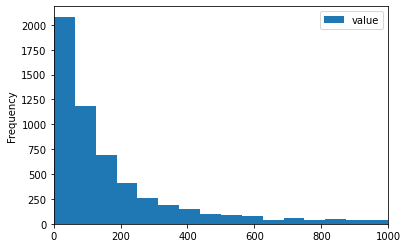

In [55]:
x.plot.hist("value", xlim=[0,1000], bins=1000)
l500 = list(x.loc[np.logical_and(x["value"] > 495,
                     x["value"] < 505)].index)

In [61]:
d500 = fulldf.loc[fulldf.company.isin(l500)].copy()

In [64]:
d500.sort_values(by="nameOfIssuer", inplace=True)
display(d500.tail(10))

,nameOfIssuer,titleOfClass,cusip,value,shrsOrPrnAmt,sshPrnamt,sshPrnamtType,investmentDiscretion,votingAuthority,Sole,Shared,None,wt,perSh,company,otherManager,putCall
501,ZUORA INC,Ordinary Share,98983V106,9000,\n\t\t\t,500,SH,SOLE,\n\t\t\t,500,0,0,0.000013,18.000000,RESOURCES-MANAGEMENT-CORP-,NaN,NaN
496,ZYNGA INC,CL A,98986T108,176000,\n,16524,SH,DFND,\n,0,0,16524,0.000076,10.651174,CITIZENS-FINANCIAL-GROUP-INC,2,NaN
476,ZYNGA INC,CL A,98986T108,4000,\n,368,PRN,SOLE,\n,0,0,368,0.000012,10.869565,Holloway-Wealth-Management,NaN,NaN
457,Zebra Technologies Corp,Equity,989207105,5631000,\n\t\t\t,10633,SH,DFND,\n\t\t\t,10633,0,0,0.001919,529.577730,Achmea-Investment-Management-B.V.,Achmea B.V.,NaN
458,Zendesk Inc,Equity,98936J101,687000,\n\t\t\t,4753,SH,DFND,\n\t\t\t,4753,0,0,0.000234,144.540290,Achmea-Investment-Management-B.V.,Achmea B.V.,NaN
459,Zimmer Biomet Holdings Inc,Equity,98956P102,1695000,\n\t\t\t,10539,SH,DFND,\n\t\t\t,10539,0,0,0.000578,160.831198,Achmea-Investment-Management-B.V.,Achmea B.V.,NaN
460,Zoetis Inc,Equity,98978V103,5208000,\n\t\t\t,27950,SH,DFND,\n\t\t\t,27950,0,0,0.001775,186.332737,Achmea-Investment-Management-B.V.,Achmea B.V.,NaN
462,Zoom Video Communications Inc,Equity,98980L101,4789000,\n\t\t\t,12373,SH,DFND,\n\t\t\t,12373,0,0,0.001632,387.052453,Achmea-Investment-Management-B.V.,Achmea B.V.,NaN
461,Zscaler Inc,Equity,98980G102,991000,\n\t\t\t,4588,SH,DFND,\n\t\t\t,0,0,0,0.000338,215.998256,Achmea-Investment-Management-B.V.,Achmea B.V.,NaN
123,eBay Inc,Equity,278642103,10560000,\n\t\t\t,150413,SH,DFND,\n\t\t\t,150413,0,0,0.003599,70.206698,Achmea-Investment-Management-B.V.,Achmea B.V.,NaN


In [52]:
y.loc[y["company"].apply(lambda x: re.search("ishare", x.lower())!=None)]


,company,value


AttributeError: 'Index' object has no attribute 'apply'

In [371]:
#fulldf.loc[fulldf["nameOfIssuer"].apply(lambda x: re.search("lphabet", x.lower()))]
alpha_a = fulldf.loc[np.logical_or(fulldf["cusip"] == '38259P508', 
                                    fulldf["cusip"] == '02079K305')]
alpha_c = fulldf.loc[np.logical_or(fulldf["cusip"] == '38259P706', 
                                    fulldf["cusip"] == '02079K107')]

In [374]:

print(alpha_a["sshPrnamt"].sum())
print(alpha_c["sshPrnamt"].sum())

270784878
237789508


In [378]:
alpha_a.sort_values(by="sshPrnamt", inplace=True)
alpha_a.tail(29)

C:\Users\jmull\Anaconda3\envs\edgar\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,nameOfIssuer,titleOfClass,cusip,value,shrsOrPrnAmt,sshPrnamt,sshPrnamtType,investmentDiscretion,votingAuthority,Sole,Shared,None,wt,perSh,company,otherManager,putCall
675,ALPHABET INC,CAP STK CL A,02079K305,-592725296,\n,1516200,SH,DFND,\n,1516200,0,0,-0.002226,-390.928173,CITADEL-ADVISORS-LLC,1.0,Call
676,ALPHABET INC,CAP STK CL A,02079K305,-542180296,\n,1536900,SH,DFND,\n,1536900,0,0,-0.002036,-352.775259,CITADEL-ADVISORS-LLC,1.0,Put
933,ALPHABET INC,CAP STK CL,02079K305,-374807296,\n\t\t\t\t,1605445,SH,DFND,\n\t\t\t\t,0,0,1605445,-0.000614,-233.460066,BANK-OF-AMERICA-CORP-,43,NaN
455,ALPHABET INC,CMN,02079K305,-322304296,\n,1626947,SH,DFND,\n,1479218,0,147729,-0.000927,-198.103746,GOLDMAN-SACHS-GROUP-INC,2,NaN
37,ALPHABET INC,CAP STK CL A,02079K305,-129132296,\n,1706058,SH,DFND,\n,1638661,0,67397,-0.003290,-75.690449,JENNISON-ASSOCIATES-LLC,1,NaN
79,ALPHABET INC,CAP STK CL A,02079K305,16875704,NaN,1765853,SH,DFND,NaN,1249252,516601,0,0.000140,9.556687,AMERICAN-CENTURY-COMPANIES-INC,1,NaN
38,ALPHABET INC CLASS A,COM,02079K305,51164704,\n\t\t\t,1779895,SH,DFND,\n\t\t\t,1614848,0,165047,0.000659,28.745911,Fisher-Asset-Management,NaN,NaN
23,ALPHABET INC,CAP STK CL A,02079K305,63758704,\n,1785052,SH,DFND,\n,1785052,0,0,0.000496,35.718121,Capital-International-Investors,"1, 2",NaN
998,ALPHABET INC,COMMON,02079K305,205822704,\n\t\t\t,1843234,SH,DFND,\n\t\t\t,1661574,0,181660,0.000374,111.663904,JPMORGAN-CHASE-&-CO,4,NaN
8,ALPHABET INC,CAP STK CL A,02079K305,462213704,\n,1948235,SH,SOLE,\n,1432099,0,516136,0.010133,237.247408,HARRIS-ASSOCIATES-L-P,NaN,NaN


In [339]:
df.sort_values(by="value", inplace=True)
display(df.tail(30))
#df.sort_values(by="name", inplace=True)
display(df.head(4))

,name,date,N,value
12692,JPMORGAN-CHASE-&-CO_19617_0000019617-21-000302...,20210512,23392,530168332904
3500,MORGAN-STANLEY_895421_0000895421-21-000475_895...,20210823,31178,543384234200
4492,MORGAN-STANLEY_895421_0000895421-21-000453_895...,20210816,31191,544660827200
11662,FMR-LLC_315066_0000315066-21-001551_315066_000...,20210514,10054,548134172080
5944,JPMORGAN-CHASE-&-CO_19617_0000019617-21-000379...,20210812,24106,550446169168
19088,BANK-OF-AMERICA-CORP-_DE__70858_0001567619-21-...,20210210,24720,557194520904
5262,FMR-LLC_315066_0000315066-21-001700_315066_000...,20210813,11401,576348775752
12059,Steward-Partners-Investment-Advisory_-LLC_1723...,20210514,3417,592530664648
11169,Steward-Partners-Investment-Advisory_-LLC_1723...,20210517,3417,592530664648
11457,BANK-OF-AMERICA-CORP-_DE__70858_0001567619-21-...,20210514,25807,606360445464


,name,date,N,value
3250,Border-to-Coast-Pensions-Partnership-Ltd_18764...,20211005,196,-28379111968
13446,Cambridge-Financial-Group_-Inc._1334199_000133...,20210507,32,-26859990464
5872,EDGEWOOD-MANAGEMENT-LLC_860561_0001062993-21-0...,20210812,82,-22494200624
5134,Cambridge-Financial-Group_-Inc._1334199_000133...,20210813,32,-19534979464


In [ ]:
df.loc[df["name"].apply(lambda x: x.lower().startswith("mutual"))]

In [ ]:
stypes = df["sshPrnamtType"].value_counts()
stypes